<a href="https://colab.research.google.com/github/sultanardian/kuliah/blob/main/data%20science/Data_Science_A_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Dataset/Supermarket Transactions.xlsx', sheet_name='Data')
data.head()

,Transaction,Purchase Date,Customer ID,Gender,Marital Status,Homeowner,Children,Annual Income,City,State or Province,Country,Product Family,Product Department,Product Category,Units Sold,Revenue
0,1,2011-12-18,7223,F,M,Y,2,$30K - $50K,Los Angeles,CA,USA,Food,Snack Foods,Snack Foods,5,27.38
1,2,2011-12-20,7841,M,M,Y,5,$70K - $90K,Los Angeles,CA,USA,Food,Produce,Vegetables,5,14.90
2,3,2011-12-21,8374,F,M,N,2,$50K - $70K,Bremerton,WA,USA,Food,Snack Foods,Snack Foods,3,5.52
3,4,2011-12-21,9619,M,M,Y,3,$30K - $50K,Portland,OR,USA,Food,Snacks,Candy,4,4.44
4,5,2011-12-22,1900,F,S,Y,3,$130K - $150K,Beverly Hills,CA,USA,Drink,Beverages,Carbonated Beverages,4,14.00


In [ ]:
data[['Revenue', 'Units Sold']].corr().iloc[0, 1]

0.29976029993046266

In [ ]:
data.drop(['Transaction', 'Customer ID'], axis = 1, inplace = True)

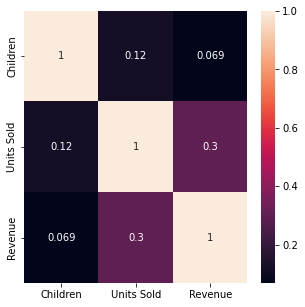

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize = (5, 5))
sns.heatmap(data.corr(), annot = True)

In [ ]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [ ]:
data.drop(['Transaction', 'Purchase Date', 'Customer ID'], axis = 1, inplace = True)

In [ ]:
temp = []

for col in data.columns:
    if (data[col].dtypes == 'object'):
        temp.append(correlation_ratio(data[col], data['Units Sold']))
    elif (data[col].dtypes != 'object'):
        temp.append(data[[col, 'Units Sold']].corr().iloc[0, 1])

correlation = pd.DataFrame([temp], columns = data.columns, index = ['Units Sold'])
correlation

,Gender,Marital Status,Homeowner,Children,Annual Income,City,State or Province,Country,Product Family,Product Department,Product Category,Units Sold,Revenue
Units Sold,0.009308,0.013401,0.009832,0.123348,0.016418,0.252481,0.100982,0.021446,0.007184,0.044674,0.051664,1.0,0.29976


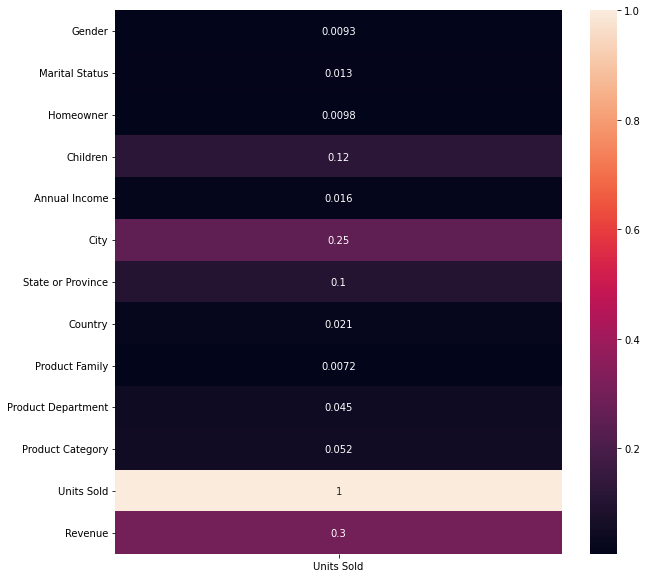

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize = (10, 10))
sns.heatmap(correlation.T   , annot = True)